In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [20, 10]
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

In [2]:
data = pd.read_csv('final_eda_null.csv')

In [3]:
data.shape

(37794, 59)

In [4]:
data.head(2)

,Unnamed: 0,myear,body,transmission,fuel,km,ip,imgCount,threesixty,dvn,oem,model,variant,City,listed_price,discountValue,utype,carType,top_features,comfort_features,interior_features,exterior_features,safety_features,Engine Type,No of Cylinder,Valves per Cylinder,Valve Configuration,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Gear Box,Drive Type,Seats,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,Doors,Cargo Volume,state,exterior_color,owner_type,Fuel Suppy System,Compression Ratio,Alloy Wheel Size,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At
0,0,2016,hatchback,manual,cng,69162.0,0,15,0,maruti wagon r lxi cng,maruti,maruti wagon r,lxi cng,lucknow,370000.0,0,dealer,corporate,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'rem...","['air conditioner', 'heater', 'digital odomete...","['adjustable head lights', 'manually adjustabl...","['centeral locking', 'child safety locks', 'da...",k10b engine,3.0,4.0,dohc,0,0,3599.0,1495.0,1700.0,2400.0,1295.0,1290.0,960.0,1350.0,5 speed,fwd,5.0,power,4.6,ventilated disc,drum,137.0,15.90,tubeless,5.0,180.0,uttar pradesh,silver,first,Multi-Point Fuel Injection,11.0,13.0,58.16,6200.0,77.0,3500.0
1,1,2015,hatchback,manual,cng,45864.0,0,15,0,maruti celerio green vxi,maruti,maruti celerio,green vxi,mumbai,365000.0,0,dealer,corporate,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'digital odomete...","['adjustable head lights', 'manually adjustabl...","['centeral locking', 'child safety locks', 'da...",k10b engine,3.0,4.0,dohc,0,0,3600.0,1600.0,1560.0,2425.0,1420.0,1410.0,915.0,1350.0,5 speed,fwd,5.0,power,4.7,ventilated disc,drum,150.0,15.05,tubeless radial,5.0,235.0,maharashtra,grey,first,Gasoline Port Injection,11.0,15.0,58.20,6000.0,78.0,3500.0


In [5]:
data.isna().sum()

Unnamed: 0              0
myear                   0
body                    0
transmission            0
fuel                    0
km                      0
ip                      0
imgCount                0
threesixty              0
dvn                     0
oem                     0
model                   0
variant                 0
City                    0
listed_price            0
discountValue           0
utype                   0
carType                 0
top_features            0
comfort_features        0
interior_features       0
exterior_features       0
safety_features         0
Engine Type             0
No of Cylinder          0
Valves per Cylinder     0
Valve Configuration     0
Turbo Charger           0
Super Charger           0
Length                  0
Width                   0
Height                  0
Wheel Base              0
Front Tread             0
Rear Tread              0
Kerb Weight             0
Gross Weight            0
Gear Box                0
Drive Type  

In [6]:
df = data.drop(columns=['Unnamed: 0'])

In [7]:
df.shape

(37794, 58)

In [8]:
df['listed_price'].replace({df['listed_price'].max():550000.555},inplace=True)

In [9]:
df['listed_price'].describe()

count    3.779400e+04
mean     7.855572e+05
std      1.132965e+06
min      1.196300e+04
25%      3.200000e+05
50%      5.250000e+05
75%      8.553972e+05
max      9.551953e+07
Name: listed_price, dtype: float64

In [10]:
df['Turning Radius'].describe()

count    37794.000000
mean         5.116515
std          0.588904
min          3.500000
25%          4.800000
50%          5.135000
75%          5.300000
max         13.510000
Name: Turning Radius, dtype: float64

<Axes: >

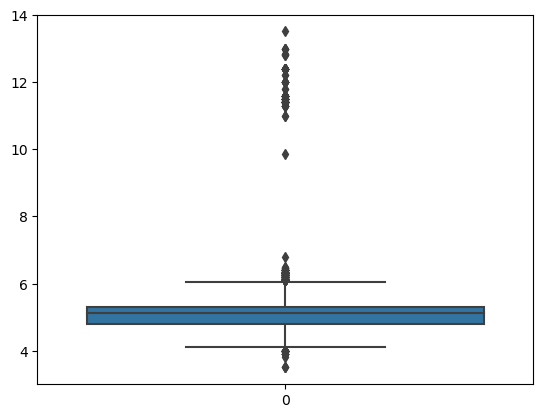

In [11]:
sns.boxplot(df['Turning Radius'])

# Valves per cylinder

In [12]:
df['Valves per Cylinder'].value_counts()

Valves per Cylinder
4.0     35335
2.0      1422
3.0      1024
5.0         7
1.0         4
48.0        1
8.0         1
Name: count, dtype: int64

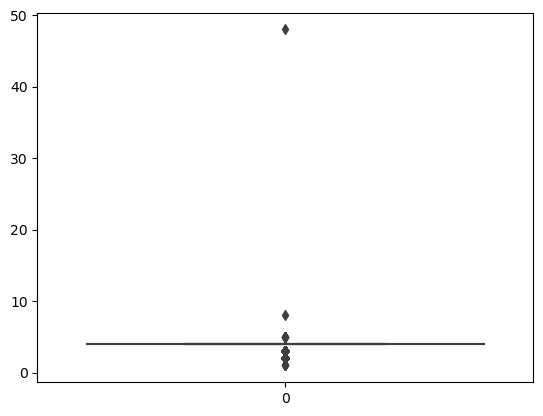

In [13]:
sns.boxplot(df['Valves per Cylinder'])
plt.show()

In [14]:
df['Valves per Cylinder'].replace({48:0}, inplace=True)

In [15]:
df['Valves per Cylinder'].isna().sum()

0

In [16]:
df[df.fuel == 'electric']['Valves per Cylinder']

1191     4.0
1192     4.0
1193     4.0
1194     4.0
1195     4.0
        ... 
14309    4.0
15072    4.0
15138    4.0
15791    4.0
15846    4.0
Name: Valves per Cylinder, Length: 130, dtype: float64

In [17]:
ind = df.loc[(df.fuel == 'electric'), 'Valves per Cylinder'].index.to_list()

In [18]:
for i in ind:
    df.loc[i, 'Valves per Cylinder'] = 0

In [19]:
df[df.fuel == 'electric']['Valves per Cylinder']

1191     0.0
1192     0.0
1193     0.0
1194     0.0
1195     0.0
        ... 
14309    0.0
15072    0.0
15138    0.0
15791    0.0
15846    0.0
Name: Valves per Cylinder, Length: 130, dtype: float64

In [20]:
df['Valves per Cylinder'].value_counts()

Valves per Cylinder
4.0    35206
2.0     1422
3.0     1024
0.0      130
5.0        7
1.0        4
8.0        1
Name: count, dtype: int64

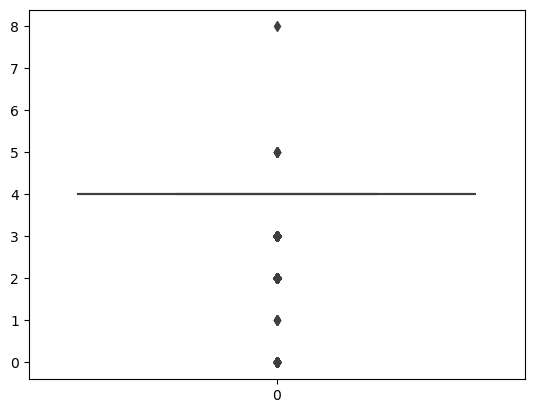

In [21]:
sns.boxplot(df['Valves per Cylinder'])
plt.show()

# Number of cylinders

In [22]:
df['No of Cylinder'].isna().sum()

0

In [23]:
df[df.fuel == 'electric']['No of Cylinder'].value_counts()

No of Cylinder
0.0     102
4.0      19
2.0       8
16.0      1
Name: count, dtype: int64

In [24]:
ind = df[df.fuel == 'electric']['No of Cylinder'].index.to_list()

In [25]:
for i in ind:
    df.loc[i, 'No of Cylinder'] = 0

In [26]:
df[df.fuel == 'electric']['No of Cylinder'].value_counts()

No of Cylinder
0.0    130
Name: count, dtype: int64

# Car Age

In [27]:
#car Age 
df['myear'] = df['myear'].astype('int')

current_year = pd.Timestamp.today().year

df['Car Age'] = current_year - df['myear']

df

df['Car Age'].unique()

def categorize_age(years_difference):
    if years_difference < 2:
        return 'very new'
    elif 2 <= years_difference < 5:
        return 'new'
    elif 5 <= years_difference < 15:
        return 'old'
    else:
        return 'very old'

df['age_category'] = df['Car Age'].apply(categorize_age)

In [28]:
# Colour Grouping

df_color = df['exterior_color'].unique().tolist()

df_color



def map_to_primary(color):
    color = color.lower()  
    if 'red' in color or 'cherry' in color:
        return 'red'
    elif 'blue' in color or 'aqua' in color or 'earth' in color:
        return 'blue'
    elif 'green' in color or 'military' in color or 'army' in color:
        return 'green'
    elif 'yellow' in color or 'lime' in color:
        return 'yellow'
    elif 'orange' in color or 'sand' in color:
        return 'orange'
    elif 'brown' in color or 'chocolate' in color or 'maroon' in color or 'khaki' in color or 'rust' in color:
        return 'brown'
    elif 'grey' in color or 'gray' in color or 'silver' in color:
        return 'grey'
    elif 'white' in color or 'moonlight' in color:
        return 'white'
    elif 'black' in color or 'blackk' in color:
        return 'black'
    elif 'gold' in color or 'golden' in color:
        return 'gold'
    elif 'bronze' in color or 'bronz' in color or 'brounze' in color or 'bronzo' in color or 'copper' in color:
        return 'bronze'
    elif 'purple' in color or 'plum' in color:
        return 'purple'
    elif 'pink' in color:
        return 'pink'
    elif 'beige' in color:
        return 'beige'
    else:
        return 'other' 


df['primary_color'] = df['exterior_color'].apply(map_to_primary)

In [29]:
int_feat = []
for i in df['interior_features']:
    int_feat.append((len(i.split(sep=','))))
df['interior_features'] = int_feat

In [30]:
ext_feat = []
for i in df['exterior_features']:
    ext_feat.append((len(i.split(sep=','))))
df['exterior_features'] = ext_feat

In [31]:
com_feat = []
for i in df['comfort_features']:
    com_feat.append((len(i.split(sep=','))))
df['comfort_features'] = com_feat

In [32]:
safety_feat = []
for i in df['safety_features']:
    safety_feat.append((len(i.split(sep=','))))
df['safety_features'] = safety_feat

In [33]:
top_feat = []
for i in df['top_features']:
    top_feat.append((len(i.split(sep=','))))
df['top_features'] = top_feat

In [34]:
df.shape

(37794, 61)

In [35]:
# df.to_csv('tobeusedforML.csv')

In [36]:
df.isna().sum()

myear                   0
body                    0
transmission            0
fuel                    0
km                      0
                       ..
Max Torque Delivered    0
Max Torque At           0
Car Age                 0
age_category            0
primary_color           0
Length: 61, dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37794 entries, 0 to 37793
Data columns (total 61 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   myear                 37794 non-null  int32  
 1   body                  37794 non-null  object 
 2   transmission          37794 non-null  object 
 3   fuel                  37794 non-null  object 
 4   km                    37794 non-null  float64
 5   ip                    37794 non-null  int64  
 6   imgCount              37794 non-null  int64  
 7   threesixty            37794 non-null  int64  
 8   dvn                   37794 non-null  object 
 9   oem                   37794 non-null  object 
 10  model                 37794 non-null  object 
 11  variant               37794 non-null  object 
 12  City                  37794 non-null  object 
 13  listed_price          37794 non-null  float64
 14  discountValue         37794 non-null  int64  
 15  utype              

In [38]:
df['variant'].nunique()

3430

In [39]:
df['City'].nunique()

617

In [40]:
df['Engine Type'].nunique()

566

In [41]:
# columns to be dropped for base model building
df.drop(columns=['Compression Ratio', 'dvn', 'variant', 'City', 'Engine Type', 'exterior_color'], inplace=True)

In [42]:
num = df.select_dtypes(include=np.number).columns.to_list()
cat = df.select_dtypes(exclude=np.number).columns.to_list()

In [71]:
# df.drop(columns=['exterior_color'], inplace=True)

In [43]:
cat

['body',
 'transmission',
 'fuel',
 'oem',
 'model',
 'utype',
 'carType',
 'Valve Configuration',
 'Gear Box',
 'Drive Type',
 'Steering Type',
 'Front Brake Type',
 'Rear Brake Type',
 'Tyre Type',
 'state',
 'owner_type',
 'Fuel Suppy System',
 'age_category',
 'primary_color']

In [44]:
for i in cat:
    print(i, df[i].nunique())
    print()

body 11

transmission 2

fuel 5

oem 46

model 382

utype 2

carType 3

Valve Configuration 5

Gear Box 11

Drive Type 6

Steering Type 2

Front Brake Type 6

Rear Brake Type 6

Tyre Type 4

state 33

owner_type 6

Fuel Suppy System 14

age_category 4

primary_color 15



In [45]:
# Encoding methods

# model, oem, body, primary_color, age_category, Fuel suppy system, state, front break type, Rear break type 

In [46]:
df.shape

(37794, 55)

In [47]:
df_en = df.copy()

In [48]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()

for i in cat:
    df_en[i] = l.fit_transform(df_en[[i]])

In [49]:
df_en.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37794 entries, 0 to 37793
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   myear                 37794 non-null  int32  
 1   body                  37794 non-null  int32  
 2   transmission          37794 non-null  int32  
 3   fuel                  37794 non-null  int32  
 4   km                    37794 non-null  float64
 5   ip                    37794 non-null  int64  
 6   imgCount              37794 non-null  int64  
 7   threesixty            37794 non-null  int64  
 8   oem                   37794 non-null  int32  
 9   model                 37794 non-null  int32  
 10  listed_price          37794 non-null  float64
 11  discountValue         37794 non-null  int64  
 12  utype                 37794 non-null  int32  
 13  carType               37794 non-null  int32  
 14  top_features          37794 non-null  int64  
 15  comfort_features   

In [50]:
x = df_en.drop('listed_price', axis=1)
y = df_en[['listed_price']]

from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=7)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(26455, 54) (26455, 1)
(11339, 54) (11339, 1)


In [51]:
xtrain.index

Index([11149, 14688, 20033,  2229,  5302,  7585, 18641, 22071,  1100, 27025,
       ...
       23468,  1092, 19623, 27354, 28232,  2583, 34140, 13927,   919, 10742],
      dtype='int64', length=26455)

In [52]:
ytrain.index

Index([11149, 14688, 20033,  2229,  5302,  7585, 18641, 22071,  1100, 27025,
       ...
       23468,  1092, 19623, 27354, 28232,  2583, 34140, 13927,   919, 10742],
      dtype='int64', length=26455)

In [53]:
x.isna().sum().sum()

0

In [54]:
xtrain.isna().sum().sum()

0

In [55]:
xtest.isna().sum().sum()

0

In [56]:
ytrain.isna().sum().sum(), ytest.isna().sum().sum()

(0, 0)

In [57]:
from sklearn.preprocessing import RobustScaler

r = RobustScaler()
xtrain_sc = r.fit_transform(xtrain)
xtrain_sc = pd.DataFrame(xtrain_sc, columns=xtrain.columns)

In [58]:
xtrain_sc.describe()

,myear,body,transmission,fuel,km,ip,imgCount,threesixty,oem,model,discountValue,utype,carType,top_features,comfort_features,interior_features,exterior_features,safety_features,No of Cylinder,Valves per Cylinder,Valve Configuration,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Gear Box,Drive Type,Seats,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,Doors,Cargo Volume,state,owner_type,Fuel Suppy System,Alloy Wheel Size,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Car Age,age_category,primary_color
count,26455.000000,26455.000000,26455.000000,26455.000000,26455.000000,26455.000000,26455.000000,26455.000000,26455.000000,26455.000000,26455.000000,26455.000000,26455.000000,26455.000000,26455.000000,26455.000000,26455.000000,26455.000000,26455.000000,26455.000000,26455.000000,26455.000000,26455.000000,26455.000000,26455.000000,26455.000000,26455.000000,26455.000000,26455.000000,26455.000000,26455.000000,26455.000000,26455.000000,26455.000000,26455.000000,26455.000000,26455.000000,26455.000000,26455.000000,26455.000000,26455.000000,26455.000000,26455.000000,26455.000000,26455.000000,26455.000000,26455.000000,26455.000000,26455.000000,26455.000000,26455.000000,26455.000000,26455.000000,26455.000000
mean,-0.085814,-0.324924,-0.238102,-0.429018,0.111827,0.010130,0.053996,0.197619,-0.094743,-0.054609,80.287318,0.155925,-0.141221,-0.239539,0.000769,-0.000050,-0.002635,-0.045391,-0.194746,-0.113892,0.365325,0.463769,0.463769,0.177848,0.128346,0.320996,0.116665,-0.225046,-0.247245,0.203979,0.158342,0.475713,-0.165224,0.237913,-0.017123,-0.005904,0.362843,-0.340994,0.021994,0.061603,-0.238669,-0.336194,-0.080247,0.027319,0.315649,-0.059800,0.085485,0.315083,-0.193329,0.300458,-0.164274,0.085814,-0.031790,0.126882
std,0.758322,0.447049,0.425930,0.505599,1.113009,0.100141,0.761584,0.398210,0.901610,0.759910,2821.947578,0.362791,0.350312,0.817539,0.688246,0.831351,0.667266,0.660910,0.572507,0.464586,0.481260,0.498695,0.498695,0.610214,1.139901,0.778551,0.740634,1.124749,1.127160,0.753019,0.728533,0.992756,0.879846,0.722328,0.129734,1.155068,0.489889,0.839256,0.869389,1.069714,0.472221,0.495076,0.714597,0.570056,0.504419,0.464739,0.756563,0.958720,0.528268,0.954433,0.549918,0.758322,0.649286,0.689067
min,-6.600000,-1.142857,-1.000000,-1.333333,-1.086093,0.000000,-1.363636,0.000000,-2.166667,-1.508197,0.000000,0.000000,-2.000000,-8.000000,-1.555556,-3.000000,-1.285714,-1.909091,-4.000000,-4.000000,-0.333333,0.000000,0.000000,-1.897710,-3.522124,-2.482993,-3.222749,-5.009184,-17.653900,-1.514943,-1.655214,-3.000000,-4.000000,-5.000000,-1.000000,-3.233030,-0.666667,-4.000000,-3.911633,-3.754543,-3.000000,-3.000000,-1.249407,-1.214286,-0.500000,-0.600000,-4.000000,-1.752763,-1.940000,-1.263063,-1.781333,-1.400000,-1.000000,-1.333333
25%,-0.600000,-0.857143,0.000000,-1.000000,-0.478595,0.000000,-0.454545,0.000000,-0.750000,-0.680328,0.000000,0.000000,0.000000,0.000000,-0.555556,-0.333333,-0.571429,-0.545455,0.000000,0.000000,0.000000,0.000000,0.000000,-0.320611,-0.292035,-0.238095,-0.450237,-0.480612,-0.654974,-0.379310,-0.416125,0.000000,0.000000,0.000000,0.000000,-0.633030,0.000000,0.000000,-0.570468,-0.358301,0.000000,-1.000000,-0.553360,-0.428571,0.000000,-0.600000,-0.500000,-0.326641,-0.750000,-0.315315,-0.733333,-0.400000,0.000000,-0.166667
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.400000,0.142857,0.000000,0.000000,0.521405,0.000000,0.545455,0.000000,0.250000,0.319672,0.

In [59]:
xtest_sc = r.transform(xtest)
xtest_sc = pd.DataFrame(xtest_sc, columns=xtest.columns)

In [60]:
xtrain_sc.isna().sum().sum(), xtest_sc.isna().sum().sum()

(0, 0)

In [61]:
# Base Model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

In [62]:
import statsmodels.api as sm

xtrain_sc_c = sm.add_constant(xtrain_sc)

In [63]:
xtrain_sc_c

,const,myear,body,transmission,fuel,km,ip,imgCount,threesixty,oem,model,discountValue,utype,carType,top_features,comfort_features,interior_features,exterior_features,safety_features,No of Cylinder,Valves per Cylinder,Valve Configuration,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Gear Box,Drive Type,Seats,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,Doors,Cargo Volume,state,owner_type,Fuel Suppy System,Alloy Wheel Size,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Car Age,age_category,primary_color
0,1.0,1.2,0.142857,0.0,0.000000,-0.958459,0.0,0.545455,1.0,0.750000,0.745902,0.0,0.0,0.0,0.0,0.555556,1.000000,0.714286,0.636364,-1.0,0.0,1.0,0.0,0.0,-0.001527,0.424779,0.285714,-0.094787,-2.785031,-2.408928,-0.393103,-0.529977,0.0,0.0,0.0,0.0,-0.233030,0.0,0.0,-0.885496,1.740759,0.0,0.0,0.063241,0.071429,0.0,0.4,0.5,-0.394315,0.375,-0.441441,0.000000,-1.2,-1.0,0.666667
1,1.0,-0.8,-0.857143,0.0,0.000000,0.529273,0.0,0.000000,0.0,0.250000,0.262295,0.0,0.0,-1.0,-1.0,-0.444444,-0.333333,-0.285714,-0.636364,0.0,0.0,0.0,0.0,0.0,-0.221374,-0.132743,0.000000,-0.426540,-0.123469,0.000000,-0.321839,-0.459768,0.0,0.0,0.0,0.0,-0.633030,1.0,0.0,-0.415065,-0.309557,0.0,0.0,-0.347826,-0.500000,1.0,0.4,-0.5,-0.060907,0.250,-0.279279,0.266667,0.8,0.0,0.833333
2,1.0,1.0,-0.857143,0.0,-1.333333,-0.615126,0.0,0.545455,1.0,0.250000,0.319672,0.0,0.0,0.0,-1.0,-0.888889,-1.000000,-0.857143,-0.181818,-1.0,0.0,0.0,0.0,0.0,-0.519084,-0.796460,0.986395,-0.402844,-1.737904,-2.106010,-0.471264,-0.602083,0.0,0.0,0.0,0.0,-0.833030,0.0,0.0,-0.885496,2.081847,0.0,0.0,0.083004,0.928571,0.0,0.4,-1.0,-0.680577,0.000,-0.603604,0.000000,-1.0,-1.0,0.833333
3,1.0,-1.4,-0.285714,0.0,-1.000000,0.643249,0.0,-1.000000,0.0,0.000000,0.016393,0.0,1.0,0.0,-1.0,-0.333333,-1.000000,-0.428571,-0.909091,0.0,0.0,1.0,1.0,1.0,0.801527,1.238938,2.482993,1.137441,0.528044,0.345026,1.356322,1.006393,0.0,-4.0,2.0,0.0,0.566970,1.0,0.0,0.429532,-0.358301,0.0,0.0,-1.243373,0.071429,0.5,-0.6,0.0,0.530115,-0.950,1.036036,-0.800000,1.4,2.0,-0.333333
4,1.0,0.2,0.142857,-1.0,-1.000000,0.354702,0.0,0.909091,0.0,-1.083333,-0.877049,0.0,0.0,0.0,0.0,0.444444,0.666667,0.857143,0.818182,0.0,0.0,0.0,1.0,1.0,1.369466,1.327434,2.088435,1.563981,-0.266327,-0.298208,1.767816,1.305703,1.0,0.0,2.0,0.0,1.358662,0.0,-2.0,0.429532,-0.358301,0.0,0.0,-1.241914,-0.642857,0.0,0.6,1.5,1.567787,-1.150,2.162162,-0.773333,-0.2,0.0,0.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26450,1.0,0.4,-0.428571,0.0,0.000000,-0.314228,0.0,-0.272727,0.0,0.250000,0.147541,0.0,0.0,0.0,-1.0,-1.333333,-1.333333,-0.857143,-0.818182,0.0,0.0,0.0,0.0,0.0,-0.488550,-2.079646,1.836735,-0.805687,-3.052041,-2.445304,-0.418391,-0.279502,0.0,1.0,0.0,-1.0,-1.233030,1.0,0.0,-0.997826,0.982787,-1.0,0.0,0.869565,-0.500000,1.0,0.4,-1.0,-0.349650,0.250,-0.396396,-0.266667,-0.4,0.0,0.833333
26451,1.0,-0.6,-0.857143,0.0,0.000000,-0.195674,0.0,0.454545,0.0,-0.750000,-0.647541,0.0,0.0,0.0,0.0,-0.555556,-0.666667,-0.714286,-1.000000,0.0,0.0,0.0,0.0,0.0,-0.625954,-1.017699,0.136054,-0.663507,-1.337755,-1.312114,-0.574713,-0.018265,0.0,0.0,0.0,0.0,-0.833030,1.0,0.0,0.000000,0.000000,0.0,-1.0,-1.246245,0.928571,1.0,0.4,-1.0,-0.216558,0.250,-0.299099,0.266667,0.6,0.0,-0.166667
26452,1.0,0.4,0.000000,0.0,0.000000,-0.510710,0.0,1.363636,0.0,1.416667,1.278689,0.0,0.0,-1.0,0.0,0.333333,0.666667,0.285714,0.636364,0.0,0.0,0.0,0.0,0.0,0.954198,0.575221,-0.374150,0.853081,0.519388,0.477132,0.252874,0.005128,1.0,0.0,0.0,0.0,0.566970,1.0,-2.0,1.138966,-1.139537,0.0,-1.0,0.592885,1.071429,0.0,-0.1,0.5,1.117302,0.450,0.252252,0.266667,-0.4,0.0,-1.166667
26453,1.0,0.4,-0.857143,0.0,-1.333333,-0.556570,0.0,0.000000,0.0,0.250000,0.319672,0.0,0.0,0.0,0.0,-0.777778

In [64]:
ytrain= ytrain.reset_index(drop=True)
xtrain_sc = xtrain_sc.reset_index(drop=True)

In [65]:
ytrain.index

RangeIndex(start=0, stop=26455, step=1)

In [66]:
xtrain_sc.index

RangeIndex(start=0, stop=26455, step=1)

In [67]:
xtrain_sc_c.index

RangeIndex(start=0, stop=26455, step=1)

In [68]:
xtrain_sc_c.isna().sum().sum()

0

In [69]:
# exog_realigned = xtrain_sc_c.reindex(ytrain.index)

In [70]:
mod = sm.OLS(ytrain, xtrain_sc_c)
lin_mod = mod.fit()

In [71]:
lin_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           listed_price   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     1060.
Date:                Wed, 28 Aug 2024   Prob (F-statistic):               0.00
Time:                        19:24:38   Log-Likelihood:            -3.8864e+05
No. Observations:               26455   AIC:                         7.774e+05
Df Residuals:                   26402   BIC:                         7.778e+05
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 3.668e+05   1.47e+04     24.944      0.000    3.38e+05    3.96e+05
myear                 2.024e+05   5085.559     39.801      0.000    1.92e+05    2.12e+05
body                 -3.053e+05   1.65e+04    -18.560      0.000   -3.38e+05   -2.73e+05
transmission         -1.688e+04   1.11e+04     -1.516      0.129   -3.87e+04    4937.753
fuel                 -1.061e+05   1.45e+04     -7.332      0.000   -1.34e+05   -7.78e+04
km                   -1.618e+04   3604.550     -4.488      0.000   -2.32e+04   -9111.735
ip                    4.864e+05   3.63e+04     13.383      0.000    4.15e+05    5.58e+05
imgCount             -2959.5557   6257.432     -0.473      0.636   -1.52e+04    9305.348
threesixty            -4.89e+04   1.03e+04     -4.758      0.000    -6.9e+04   -2.88e+04
oem                   -5.23e+04   3.18e+04     -1.644      0.100   -1.15e+05       1e+04
model                  1.21e+05   3.74e+04      3.233      0.001    4.76e+04    1.94e+05
discountValue            4.1139      1.273      3.231      0.001       1.619       6.609
utype                -1.912e+04   1.28e+04     -1.490      0.136   -4.43e+04    6025.817
carType               2.169e+04   1.13e+04      1.926      0.054    -386.745    4.38e+04
top_features         -9.706e+04   5808.965    -16.708      0.000   -1.08e+05   -8.57e+04
comfort_features      3.727e+05   1.35e+04     27.553      0.000    3.46e+05    3.99e+05
interior_features      2.06e+04   9040.773      2.278      0.023    2874.812    3.83e+04
exterior_features    -1.544e+05   1.12e+04    -13.788      0.000   -1.76e+05   -1.32e+05
safety_features      -1.468e+04   1.39e+04     -1.052      0.293    -4.2e+04    1.27e+04
No of Cylinder        8.223e+04   8962.116      9.175      0.000    6.47e+04    9.98e+04
Valves per Cylinder  -1.062e+05   9350.256    -11.358      0.000   -1.25e+05   -8.79e+04
Valve Configuration   8.746e+04   9047.600      9.667      0.000    6.97e+04    1.05e+05
Turbo Charger        -5.907e+04   6476.344     -9.120      0.000   -7.18e+04   -4.64e+04
Super Charger        -5.907e+04   6476.344     -9.120      0.000   -7.18e+04   -4.64e+04
Length               -4.391e+05   2.36e+04    -18.612      0.000   -4.85e+05   -3.93e+05
Width                 1.349e+04   8097.128      1.667      0.096   -2376.793    2.94e+04
Height               -3.353e+04   8464.423     -3.962      0.000   -5.01e+04   -1.69e+04
Wheel Base            2.065e+05   1.53e+04     13.509      0.000    1.77e+05    2.37e+05
Front Tread           2.615e+04   7489.363      3.492      0.000    1.15e+04    4.08e+04
Rear Tread            4681.5739   5797.013      0.808      0.419   -6680.883     1.6e+04
Kerb Weight          -1.157e+05   1.44e+04     -8.011      0.000   -1.44e+05   -8.74e+04
Gross Weight          4.599e+04   9903.719      4.644    

In [72]:
# condition number is high
# There are variables with higher pvalues

In [73]:
lr = LinearRegression()
lr.fit(xtrain_sc, ytrain)

LinearRegression()

In [74]:
train_pred = lr.predict(xtrain_sc)
test_pred = lr.predict(xtest_sc)

In [75]:
mse1 = mean_squared_error(ytrain, train_pred)
rmse1 =  np.sqrt(mean_squared_error(ytrain, train_pred))
mae1 = mean_absolute_error(ytrain, train_pred)
mape1 = mean_absolute_percentage_error(ytrain, train_pred)

print('MSE: ', mse1)
print('RMSE: ',rmse1)
print('MAE: ', mae1)
print('MAPE: ', mape1)

MSE:  337084576566.3181
RMSE:  580589.8522763881
MAE:  287547.17183146125
MAPE:  0.5857539475912208


In [76]:
mse2 = mean_squared_error(ytest, test_pred)
rmse2 = np.sqrt(mean_squared_error(ytest, test_pred))
mae2 = mean_absolute_error(ytest, test_pred)
mape2 = mean_absolute_percentage_error(ytest, test_pred)

print('MSE: ', mse2)
print('RMSE: ', rmse2)
print('MAE: ', mae2)
print('MAPE: ', mape2)

MSE:  1016182367279.0675
RMSE:  1008058.7122182257
MAE:  299812.49239503633
MAPE:  0.5913989854366073


In [77]:
rsq1 = r2_score(ytrain, train_pred)
rsq1

0.676080586444301

In [78]:
rsq2 = r2_score(ytest, test_pred)
rsq2

0.450804223372653

In [79]:
# adjusted R-squared
adj_rsq1 = 1 - (1-r2_score(ytrain, train_pred)) * (len(ytrain)-1)/(len(ytrain)-xtrain.shape[1]-1)
adj_rsq1

0.6754180240074825

In [80]:
# adjusted R-squared
adj_rsq2 = 1 - (1-r2_score(ytest, test_pred)) * (len(ytest)-1)/(len(ytest)-xtest.shape[1]-1)
adj_rsq2

0.44817602663941336

In [81]:
sc = pd.DataFrame({'Train': [mse1, rmse1, mae1, mape1, rsq1, adj_rsq1], 
                   'Test': [mse2, rmse2, mae1, mape2, rsq2, adj_rsq2]}, 
                  index=['MSE', 'RMSE', 'MAE', 'MAPE', 'RSquared', 'Adjusted RSquared'])

In [82]:
sc

,Train,Test
MSE,3.370846e+11,1.016182e+12
RMSE,5.805899e+05,1.008059e+06
MAE,2.875472e+05,2.875472e+05
MAPE,5.857539e-01,5.913990e-01
RSquared,6.760806e-01,4.508042e-01
Adjusted RSquared,6.754180e-01,4.481760e-01


In [ ]:
# The model has low error MAE
# The model is overfit 